In [45]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
import gzip

#### Load tree index/ID info

In [46]:
trees = pd.read_csv("IQtree_CDS_concatenated_genetrees_order_reformat.txt", sep="\t", index_col=0, header=None)

In [47]:
trees[1] = trees[1].replace("outfile_", "", regex=True).replace(".rearranged.cln.fa.treefile", "", regex=True)

In [48]:
trees.columns = ["gene_id"]

In [49]:
trees

,gene_id
0,
1,Pbar_2022_maker4_00026-RA
2,Pbar_2022_maker4_00027-RB
3,Pbar_2022_maker4_00028-RA
4,Pbar_2022_maker4_00029-RA
5,Pbar_2022_maker4_00030-RA
...,...
16551,Pbar_2022_maker4_27010-RA
16552,Pbar_2022_maker4_27045-RA
16553,Pbar_2022_maker4_27068-RB


#### Load data and merge with the tree ID info

In [50]:
laevis_eatonii_barbatus = pd.read_csv("laevis_eatonii_barbatus.iqtree.weights.txt.gz", compression="gzip", index_col=None, comment="#", sep ="\t")
virgatus_barbatus_eatonii = pd.read_csv("virgatus_barbatus_eatonii.iqtree.weights.txt.gz", compression="gzip", index_col=None, comment="#", sep ="\t")

In [51]:
laevis_eatonii_barbatus.index = laevis_eatonii_barbatus.index + 1 
virgatus_barbatus_eatonii.index = virgatus_barbatus_eatonii.index + 1 

In [52]:
laevis_eatonii_barbatus = pd.concat([laevis_eatonii_barbatus, trees], axis=1)
virgatus_barbatus_eatonii = pd.concat([virgatus_barbatus_eatonii, trees], axis=1)

In [53]:
laevis_eatonii_barbatus["trio"] = ["laevis_eatonii_barbatus" for i in range(len(laevis_eatonii_barbatus.index))]
virgatus_barbatus_eatonii["trio"] = ["virgatus_barbatus_eatonii" for i in range(len(virgatus_barbatus_eatonii.index))]

In [54]:
combined_df = pd.concat([laevis_eatonii_barbatus, virgatus_barbatus_eatonii])

In [55]:
combined_df["tree_no"] = combined_df.index

In [56]:
t1_norm = combined_df["topo1"]/(combined_df["topo1"]+combined_df["topo2"]+combined_df["topo3"])
t2_norm = combined_df["topo2"]/(combined_df["topo1"]+combined_df["topo2"]+combined_df["topo3"])
t3_norm = combined_df["topo3"]/(combined_df["topo1"]+combined_df["topo2"]+combined_df["topo3"])

In [57]:
combined_df["topo1"] = t1_norm
combined_df["topo2"] = t2_norm
combined_df["topo3"] = t3_norm

In [58]:
combined_df["t3t2_diff"] = combined_df["topo3"]- combined_df["topo2"]

In [59]:
combined_df

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
1,1.00,0.00,0.0,Pbar_2022_maker4_00026-RA,laevis_eatonii_barbatus,1,0.00
2,1.00,0.00,0.0,Pbar_2022_maker4_00027-RB,laevis_eatonii_barbatus,2,0.00
3,1.00,0.00,0.0,Pbar_2022_maker4_00028-RA,laevis_eatonii_barbatus,3,0.00
4,1.00,0.00,0.0,Pbar_2022_maker4_00029-RA,laevis_eatonii_barbatus,4,0.00
5,1.00,0.00,0.0,Pbar_2022_maker4_00030-RA,laevis_eatonii_barbatus,5,0.00
...,...,...,...,...,...,...,...
16551,0.72,0.28,0.0,Pbar_2022_maker4_27010-RA,virgatus_barbatus_eatonii,16551,-0.28
16552,0.20,0.30,0.5,Pbar_2022_maker4_27045-RA,virgatus_barbatus_eatonii,16552,0.20
16553,1.00,0.00,0.0,Pbar_2022_maker4_27068-RB,virgatus_barbatus_eatonii,16553,0.00
16554,0.40,0.40,0.2,Pbar_2022_maker4_27101-RA,virgatus_barbatus_eatonii,16554,-0.20


#### Plot the topology weights

##### Display the topologies

In [60]:
laevis_eatonii_barbatus_topos = {}
with gzip.open("laevis_eatonii_barbatus.iqtree.weights.txt.gz", "rt") as fin:
    for line in fin:
        if "#" in line:
            #print(line.split())
            t = line.split()[0]
            tr = line.split()[1]
            laevis_eatonii_barbatus_topos[t] = tr
            
laevis_eatonii_barbatus_topos

{'#topo1': '(palmeri,((laevis,eatonii),barbatus));',
 '#topo2': '(palmeri,((laevis,barbatus),eatonii));',
 '#topo3': '(palmeri,(laevis,(eatonii,barbatus)));'}

In [61]:
virgatus_barbatus_eatonii_topos={}
with gzip.open("virgatus_barbatus_eatonii.iqtree.weights.txt.gz", "rt") as fin:
    for line in fin:
        if "#" in line:
            #print(line.split())
            t = line.split()[0]
            tr = line.split()[1]
            virgatus_barbatus_eatonii_topos[t] = tr
            
virgatus_barbatus_eatonii_topos

{'#topo1': '(palmeri,((virgatus,barbatus),eatonii));',
 '#topo2': '(palmeri,((virgatus,eatonii),barbatus));',
 '#topo3': '(palmeri,(virgatus,(barbatus,eatonii)));'}

##### Plot distributions of normalized topology weights

In [62]:
combined_df[["topo1", "topo2", "topo3", "t3t2_diff"]].mean()

topo1        0.643960
topo2        0.182144
topo3        0.173897
t3t2_diff   -0.008247
dtype: float64

In [63]:
combined_df[["topo1", "topo2", "topo3", "t3t2_diff"]].std()

topo1        0.344713
topo2        0.245192
topo3        0.240331
t3t2_diff    0.341950
dtype: float64

In [64]:
print(0.173897 + 0.240331)
print(0.173897 + 2*0.240331)

0.414228
0.654559


In [65]:
print(-0.008247 + 0.341950)
print(-0.008247 + 2*0.341950)

0.33370299999999997
0.675653


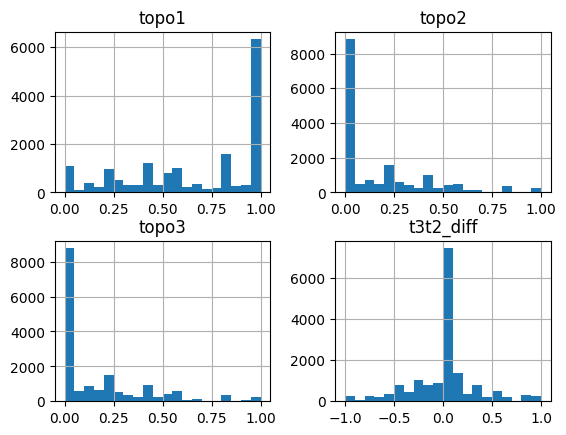

In [66]:
combined_df[["topo1", "topo2", "topo3", "t3t2_diff"]][combined_df["trio"]=="laevis_eatonii_barbatus"].hist(bins=20);

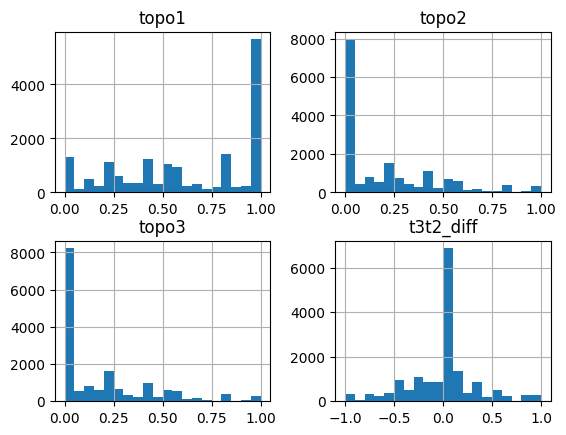

In [67]:
combined_df[["topo1", "topo2", "topo3", "t3t2_diff"]][combined_df["trio"]=="virgatus_barbatus_eatonii"].hist(bins=20);

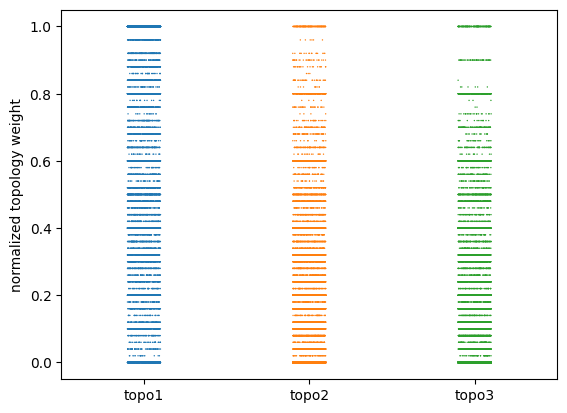

In [68]:
sns.stripplot(combined_df[["topo1", "topo2", "topo3"]][combined_df["trio"]=="laevis_eatonii_barbatus"], s=1, alpha=1)
plt.ylabel("normalized topology weight"); 

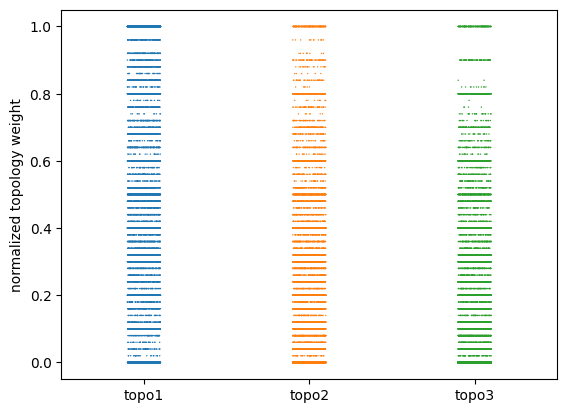

In [69]:
sns.stripplot(combined_df[["topo1", "topo2", "topo3"]][combined_df["trio"]=="virgatus_barbatus_eatonii"], s=1, alpha=1)
plt.ylabel("normalized topology weight"); 

#### Get the extreme peaks with high topo3 weights and find overlap between the two tests

In [70]:
#topo3_cutoff = 0.65 #mean plus two standard deviations for topo3 weighting
#t3t2diff_cutoff = 0.65 #mean plus two standard deviations for topo3 weighting

topo3_cutoff = 0.41 #mean plus 1 standard deviations for topo3 weighting
t3t2diff_cutoff = 0.33 #mean plus 1 standard deviations for topo3 weighting

In [71]:
laevis_eatonii_barbatus_peaks = combined_df[(combined_df["trio"]=="laevis_eatonii_barbatus") & (combined_df["topo3"]==1.0)]
#laevis_eatonii_barbatus_peaks = combined_df[(combined_df["trio"]=="laevis_eatonii_barbatus") & (combined_df["t3t2_diff"]>=cutoff)]
#laevis_eatonii_barbatus_peaks = combined_df[(combined_df["trio"]=="laevis_eatonii_barbatus") & (combined_df["topo3"]>=topo3_cutoff) & (combined_df["t3t2_diff"]>=t3t2diff_cutoff)]

laevis_eatonii_barbatus_peaks

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
12,0.0,0.0,1.0,Pbar_2022_maker4_00037-RA,laevis_eatonii_barbatus,12,1.0
237,0.0,0.0,1.0,Pbar_2022_maker4_00417-RA,laevis_eatonii_barbatus,237,1.0
251,0.0,0.0,1.0,Pbar_2022_maker4_00437-RA,laevis_eatonii_barbatus,251,1.0
268,0.0,0.0,1.0,Pbar_2022_maker4_00460-RA,laevis_eatonii_barbatus,268,1.0
370,0.0,0.0,1.0,Pbar_2022_maker4_00609-RB,laevis_eatonii_barbatus,370,1.0
...,...,...,...,...,...,...,...
16090,0.0,0.0,1.0,Pbar_2022_maker4_26119-RA,laevis_eatonii_barbatus,16090,1.0
16171,0.0,0.0,1.0,Pbar_2022_maker4_26223-RA,laevis_eatonii_barbatus,16171,1.0
16214,0.0,0.0,1.0,Pbar_2022_maker4_26285-RA,laevis_eatonii_barbatus,16214,1.0
16243,0.0,0.0,1.0,Pbar_2022_maker4_26328-RB,laevis_eatonii_barbatus,16243,1.0


In [72]:
virgatus_barbatus_eatonii_peaks = combined_df[(combined_df["trio"]=="virgatus_barbatus_eatonii") & (combined_df["topo3"]==1.0)]
#virgatus_barbatus_eatonii_peaks = combined_df[(combined_df["trio"]=="virgatus_barbatus_eatonii") & (combined_df["t3t2_diff"]>=cutoff)]
#virgatus_barbatus_eatonii_peaks = combined_df[(combined_df["trio"]=="virgatus_barbatus_eatonii") & (combined_df["topo3"]>=cutoff) & (combined_df["t3t2_diff"]>=t3t2diff_cutoff)]

virgatus_barbatus_eatonii_peaks

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
159,0.0,0.0,1.0,Pbar_2022_maker4_00200-RB,virgatus_barbatus_eatonii,159,1.0
179,0.0,0.0,1.0,Pbar_2022_maker4_00224-RA,virgatus_barbatus_eatonii,179,1.0
241,0.0,0.0,1.0,Pbar_2022_maker4_00422-RA,virgatus_barbatus_eatonii,241,1.0
268,0.0,0.0,1.0,Pbar_2022_maker4_00460-RA,virgatus_barbatus_eatonii,268,1.0
288,0.0,0.0,1.0,Pbar_2022_maker4_00484-RA,virgatus_barbatus_eatonii,288,1.0
...,...,...,...,...,...,...,...
16190,0.0,0.0,1.0,Pbar_2022_maker4_26247-RB,virgatus_barbatus_eatonii,16190,1.0
16319,0.0,0.0,1.0,Pbar_2022_maker4_26422-RA,virgatus_barbatus_eatonii,16319,1.0
16450,0.0,0.0,1.0,Pbar_2022_maker4_26715-RB,virgatus_barbatus_eatonii,16450,1.0
16529,0.0,0.0,1.0,Pbar_2022_maker4_26949-RA,virgatus_barbatus_eatonii,16529,1.0


In [73]:
overlap = list(set(virgatus_barbatus_eatonii_peaks.index).intersection(set(laevis_eatonii_barbatus_peaks.index)))

In [74]:
overlap_peaks = virgatus_barbatus_eatonii_peaks.loc[overlap]
print(len(overlap_peaks))
overlap_peaks

10


,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
14368,0.0,0.0,1.0,Pbar_2022_maker4_23816-RA,virgatus_barbatus_eatonii,14368,1.0
12231,0.0,0.0,1.0,Pbar_2022_maker4_20228-RA,virgatus_barbatus_eatonii,12231,1.0
268,0.0,0.0,1.0,Pbar_2022_maker4_00460-RA,virgatus_barbatus_eatonii,268,1.0
13741,0.0,0.0,1.0,Pbar_2022_maker4_22926-RA,virgatus_barbatus_eatonii,13741,1.0
4044,0.0,0.0,1.0,Pbar_2022_maker4_07525-RA,virgatus_barbatus_eatonii,4044,1.0
2961,0.0,0.0,1.0,Pbar_2022_maker4_06095-RA,virgatus_barbatus_eatonii,2961,1.0
9781,0.0,0.0,1.0,Pbar_2022_maker4_16869-RA,virgatus_barbatus_eatonii,9781,1.0
3416,0.0,0.0,1.0,Pbar_2022_maker4_06721-RA,virgatus_barbatus_eatonii,3416,1.0
9017,0.0,0.0,1.0,Pbar_2022_maker4_15330-RA,virgatus_barbatus_eatonii,9017,1.0
1019,0.0,0.0,1.0,Pbar_2022_maker4_01435-RD,virgatus_barbatus_eatonii,1019,1.0


In [75]:
overlap_peaks.to_csv("overlap-peaks-eatonii-barbatus.csv", sep=",")

In [76]:
with open("overlap-peaks-gene-id-eatonii-barbatus.txt", "w") as fout:
    for entry in list(overlap_peaks.gene_id):
        fout.write(entry + "\n")

In [77]:
# Run a bash script to extract the overlap peak annotations from the gff 
import subprocess
rc = subprocess.call("/home/lcwheeler/Documents/WessingerLabPostdoc/research/Habroanthus/twisst_analyses/CDS_target_trios/extract_annotations_eatonii_barbatus.sh")

##### Look for the QTL candidate genes in the dataset

In [78]:
combined_df[combined_df.gene_id == "Pbar_2022_maker4_17275-RA"] #AP2

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
10013,1.0,0.0,0.0,Pbar_2022_maker4_17275-RA,laevis_eatonii_barbatus,10013,0.0
10013,0.0,1.0,0.0,Pbar_2022_maker4_17275-RA,virgatus_barbatus_eatonii,10013,-1.0


In [79]:
combined_df[combined_df.gene_id == "Pbar_2022_maker4_13258-RB"] #bHLH

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
7927,0.34,0.32,0.34,Pbar_2022_maker4_13258-RB,laevis_eatonii_barbatus,7927,0.02
7927,0.24,0.60,0.16,Pbar_2022_maker4_13258-RB,virgatus_barbatus_eatonii,7927,-0.44


In [80]:
combined_df[combined_df.gene_id == "Pbar_2022_maker4_12689-RA"] #F3'5'H did not make it into the filtered CDS dataset

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff


##### Add coordinates for the significant overlap peaks

In [81]:
peaks_annot = pd.read_csv("/home/lcwheeler/Documents/WessingerLabPostdoc/research/Habroanthus/twisst_analyses/CDS_target_trios/peaks-genes-annotations-eatonii-barbatus.gff", 
                          sep="\t", header=None)

In [82]:
peaks_annot["pos"] = np.round((peaks_annot[3] + peaks_annot[4])/2)

In [83]:
gid = []
for entry in peaks_annot[8]:
    m = entry.split("ID=")[1].split(";")[0].split(":")[0]
    gid.append(m)

In [84]:
peaks_annot["gene_id"] = gid

In [85]:
peaks_annot = peaks_annot[peaks_annot[2] == "CDS"]

In [86]:
peaks_annot

,0,1,2,3,4,5,6,7,8,pos,gene_id
12,LG08,maker,CDS,80345501,80345650,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80345576.0,Pbar_2022_maker4_06095-RA
13,LG08,maker,CDS,80345316,80345413,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80345364.0,Pbar_2022_maker4_06095-RA
14,LG08,maker,CDS,80345054,80345231,.,-,1,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80345142.0,Pbar_2022_maker4_06095-RA
15,LG08,maker,CDS,80344787,80344963,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80344875.0,Pbar_2022_maker4_06095-RA
16,LG08,maker,CDS,80344194,80344325,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80344260.0,Pbar_2022_maker4_06095-RA
17,LG08,maker,CDS,80343908,80344006,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80343957.0,Pbar_2022_maker4_06095-RA
18,LG08,maker,CDS,80343451,80343567,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80343509.0,Pbar_2022_maker4_06095-RA
19,LG08,maker,CDS,80343217,80343312,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80343264.0,Pbar_2022_maker4_06095-RA
20,LG08,maker,CDS,80343012,80343124,.,-,0,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80343068.0,Pbar_2022_maker4_06095-RA
21,LG08,maker,CDS,80342759,80342876,.,-,1,ID=Pbar_2022_maker4_06095-RA:cds;Parent=Pbar_2...,80342818.0,Pbar_2022_maker4_06095-RA


In [87]:
overlap_peaks.index = overlap_peaks.gene_id
peaks_annot.index = peaks_annot.gene_id

In [88]:
overlap_peaks = overlap_peaks.loc[peaks_annot.index]

In [89]:
overlap_peaks["pos"] = peaks_annot["pos"]
overlap_peaks["chromosome"] = peaks_annot[0]

In [90]:
# Drop duplicate indexes from the overlap peaks dataframe
overlap_peaks = overlap_peaks[~overlap_peaks.index.duplicated(keep='first')]

In [91]:
overlap_peaks

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff,pos,chromosome
gene_id,,,,,,,,,
Pbar_2022_maker4_06095-RA,0.0,0.0,1.0,Pbar_2022_maker4_06095-RA,virgatus_barbatus_eatonii,2961,1.0,80345576.0,LG08
Pbar_2022_maker4_06721-RA,0.0,0.0,1.0,Pbar_2022_maker4_06721-RA,virgatus_barbatus_eatonii,3416,1.0,86022000.0,LG08
Pbar_2022_maker4_07525-RA,0.0,0.0,1.0,Pbar_2022_maker4_07525-RA,virgatus_barbatus_eatonii,4044,1.0,92229140.0,LG08
Pbar_2022_maker4_22926-RA,0.0,0.0,1.0,Pbar_2022_maker4_22926-RA,virgatus_barbatus_eatonii,13741,1.0,39783608.0,LG06
Pbar_2022_maker4_23816-RA,0.0,0.0,1.0,Pbar_2022_maker4_23816-RA,virgatus_barbatus_eatonii,14368,1.0,48602216.0,LG06
Pbar_2022_maker4_00460-RA,0.0,0.0,1.0,Pbar_2022_maker4_00460-RA,virgatus_barbatus_eatonii,268,1.0,3836324.0,LG07
Pbar_2022_maker4_01435-RD,0.0,0.0,1.0,Pbar_2022_maker4_01435-RD,virgatus_barbatus_eatonii,1019,1.0,12573530.0,LG07
Pbar_2022_maker4_20228-RA,0.0,0.0,1.0,Pbar_2022_maker4_20228-RA,virgatus_barbatus_eatonii,12231,1.0,17230834.0,LG05
Pbar_2022_maker4_15330-RA,0.0,0.0,1.0,Pbar_2022_maker4_15330-RA,virgatus_barbatus_eatonii,9017,1.0,5095634.0,LG04


In [92]:
overlap_peaks.to_csv("overlap-peaks-eatonii-barbatus-coords.csv", sep=",")

In [93]:
overlap_peaks[overlap_peaks.chromosome == "LG01"]#[overlap_peaks.pos > 60000000]

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff,pos,chromosome
gene_id,,,,,,,,,


##### Plot the topology weights by genetree and comparison

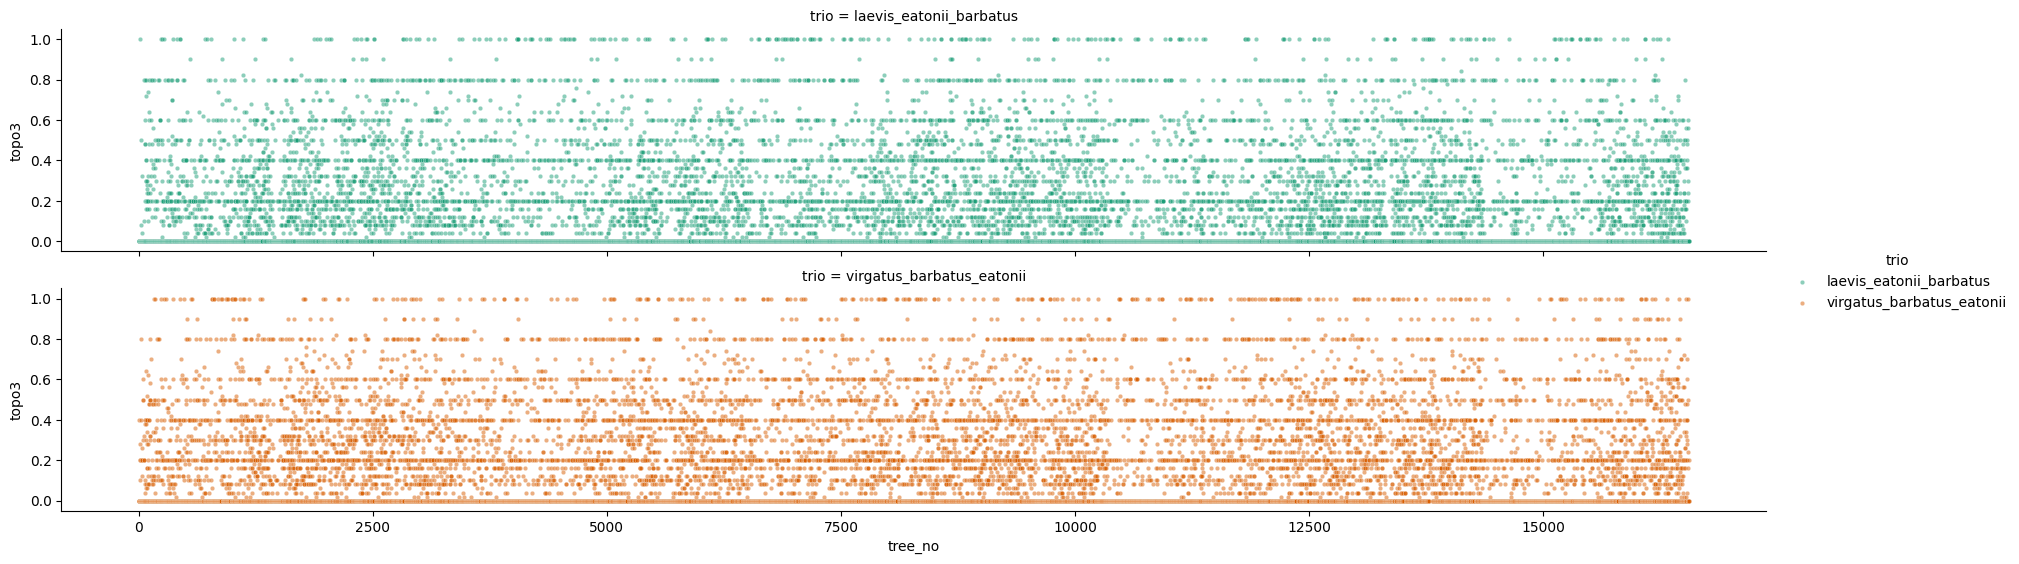

In [94]:
g = sns.FacetGrid(combined_df, row="trio", hue="trio", aspect=6, height=3, palette="Dark2")

g.map(sns.scatterplot, "tree_no", "topo3", alpha=.5, s=10)
#g.map(sns.scatterplot, "tree_no", "topo1", alpha=.5, s=10, color="orange")
g.add_legend();

g.fig.subplots_adjust(top=0.9) 
#g.fig.suptitle(key);

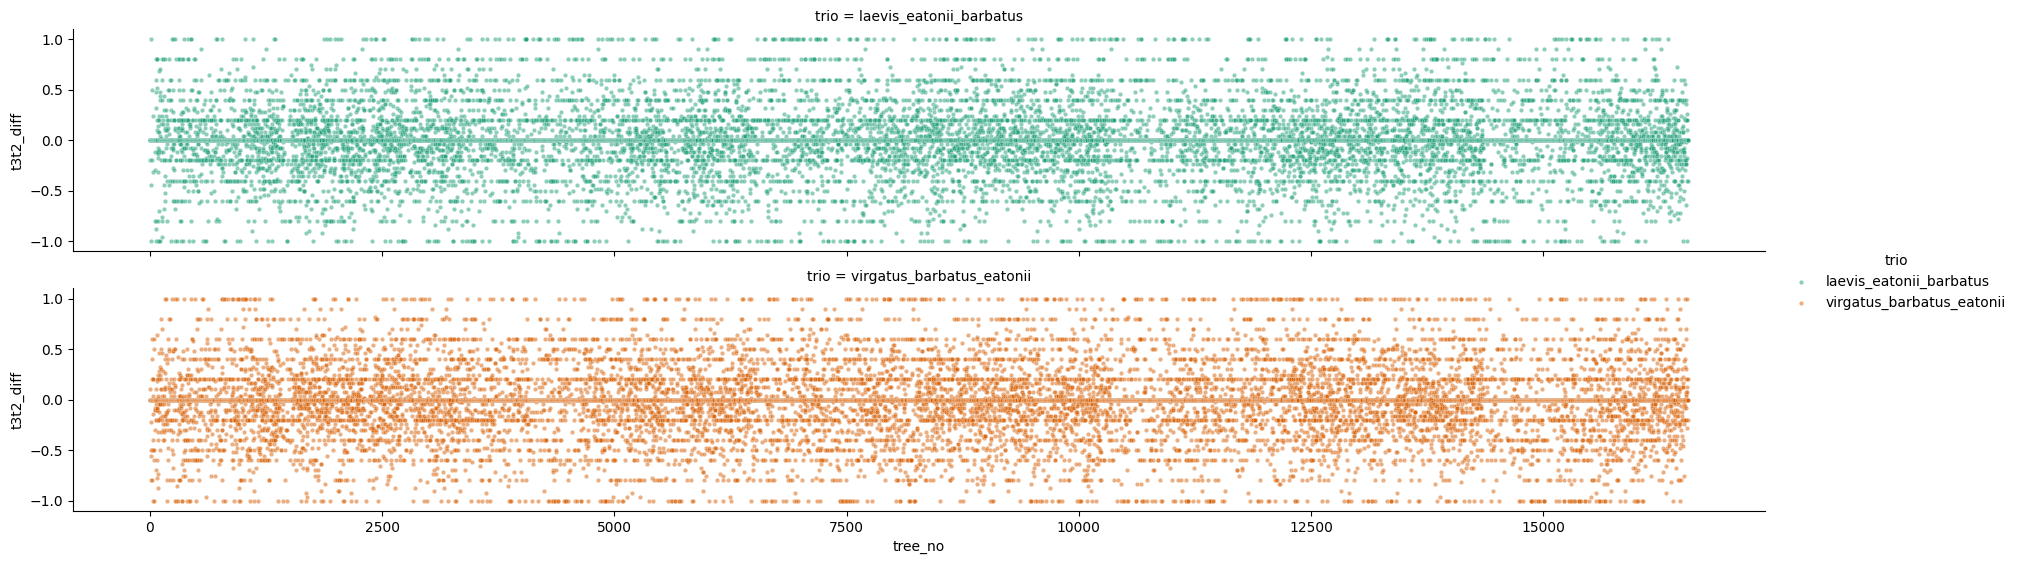

In [95]:
g = sns.FacetGrid(combined_df, row="trio", hue="trio", aspect=6, height=3, palette="Dark2")

g.map(sns.scatterplot, "tree_no", "t3t2_diff", alpha=.5, s=10)
#g.map(sns.scatterplot, "tree_no", "topo1", alpha=.5, s=10, color="orange")
g.add_legend();

g.fig.subplots_adjust(top=0.9) 
#g.fig.suptitle(key);

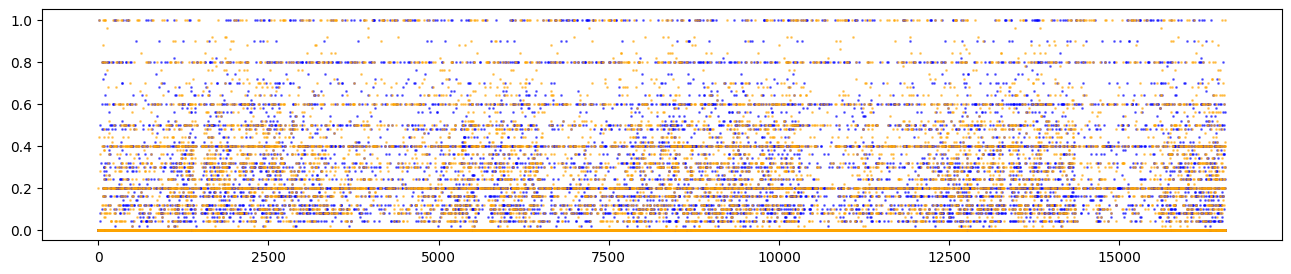

In [96]:
plt.figure(figsize=(16,3))
plt.scatter(combined_df["tree_no"][combined_df["trio"]=="laevis_eatonii_barbatus"], combined_df["topo3"][combined_df["trio"]=="laevis_eatonii_barbatus"], 
         alpha=.5, s=1, color="blue");

plt.scatter(combined_df["tree_no"][combined_df["trio"]=="laevis_eatonii_barbatus"], combined_df["topo2"][combined_df["trio"]=="laevis_eatonii_barbatus"], 
         alpha=.5, s=1, color="orange");

#plt.scatter(combined_df["tree_no"][combined_df["trio"]=="laevis_eatonii_barbatus"], combined_df["topo1"][combined_df["trio"]=="laevis_eatonii_barbatus"], 
         #alpha=.5, s=1, color="gray");

In [97]:
combined_df[["gene_id", "t3t2_diff"]]

,gene_id,t3t2_diff
1,Pbar_2022_maker4_00026-RA,0.00
2,Pbar_2022_maker4_00027-RB,0.00
3,Pbar_2022_maker4_00028-RA,0.00
4,Pbar_2022_maker4_00029-RA,0.00
5,Pbar_2022_maker4_00030-RA,0.00
...,...,...
16551,Pbar_2022_maker4_27010-RA,-0.28
16552,Pbar_2022_maker4_27045-RA,0.20
16553,Pbar_2022_maker4_27068-RB,0.00
16554,Pbar_2022_maker4_27101-RA,-0.20


#### Examine the relationship between twisst topo weights and subs/site branch lengths

In [98]:
# Load subs/site dataframe
subs = pd.read_csv("/home/lcwheeler/Documents/WessingerLabPostdoc/research/Habroanthus/substitution_rate_variation/combined_sub_rates_dataframe.csv", index_col=0).T

In [99]:
subs

,CAW147_4_S462,CAW65_17_S470,CAW41_PL6_S478,CAW62_6_S476,CAW41_PL5_S477,CAW98_1_S441,THD_grac_S382,THD_okla_002A_S375,THD_hirs_005J_S373,cardBL_1_S443,...,CAW50_8_S474,CAW18_1_S442,CAW157_2_S450,CAW15_334_S471,CAW108_1_S460,scario_alp1_S466,CAW111_1_S457,CAW115_1_S461,CAW151_3_S448,CAW62_2_S475
Pbar_2022_maker4_15565-RB,0.002960,1.053900e-06,1.053900e-06,0.000001,0.000001,0.006408,0.000001,0.000001,0.000001,0.000001,...,0.001622,0.005555,1.053900e-06,0.000001,1.442944e-03,2.463200e-06,0.000002,0.000002,0.000001,0.000001
Pbar_2022_maker4_06040-RA,0.000001,8.299089e-04,1.000000e-06,0.004059,0.000001,0.005018,0.000001,0.005018,0.006569,0.004980,...,0.000003,0.004931,8.126145e-04,0.000001,1.000000e-06,3.167146e-03,0.003302,0.000001,0.000001,0.000001
Pbar_2022_maker4_06782-RA,0.000482,1.001600e-06,1.001600e-06,0.000001,0.000001,0.001447,0.000001,0.002932,0.000926,0.000524,...,0.000001,0.001262,1.001600e-06,0.000001,1.001600e-06,9.641682e-04,0.000460,0.002437,0.000001,0.000743
Pbar_2022_maker4_04883-RA,0.000001,1.000000e-06,1.000000e-06,0.005168,0.002546,0.002545,0.000001,0.000001,0.002522,0.005099,...,0.000001,0.000001,2.501362e-03,0.000001,1.000000e-06,1.000000e-06,0.000001,0.005051,0.000001,0.000001
Pbar_2022_maker4_25762-RB,0.000451,9.982000e-07,9.982000e-07,0.000725,0.000002,0.007056,0.000824,0.000003,0.000002,0.002273,...,0.002926,0.008483,9.982000e-07,0.000836,9.982000e-07,9.982000e-07,0.001567,0.000963,0.000828,0.002537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pbar_2022_maker4_00617-RD,0.000001,2.220600e-06,6.370438e-04,0.000001,0.000001,0.003193,0.000634,0.000001,0.000001,0.002224,...,0.000639,0.000001,1.903604e-03,0.000001,1.000000e-06,2.253300e-06,0.001269,0.000634,0.000001,0.002541
Pbar_2022_maker4_17238-RA,0.001030,1.036236e-03,1.000000e-06,0.001516,0.000001,0.001047,0.001067,0.000001,0.001128,0.000999,...,0.000001,0.001010,2.020874e-03,0.000001,2.978963e-03,1.000000e-06,0.000001,0.000001,0.001006,0.000001
Pbar_2022_maker4_06036-RA,0.000003,1.000000e-06,1.000000e-06,0.002823,0.000001,0.003823,0.000001,0.003854,0.001870,0.000001,...,0.000001,0.000940,1.000000e-06,0.000001,1.000000e-06,1.000000e-06,0.000001,0.001183,0.000001,0.000001
Pbar_2022_maker4_24164-RA,0.000001,1.000000e-06,8.406954e-04,0.000002,0.000001,0.000829,0.000876,0.001786,0.000934,0.003320,...,0.000001,0.004981,1.000000e-06,0.000001,1.000000e-06,8.178750e-04,0.000001,0.000001,0.000802,0.000001


In [100]:
combined_df.index = combined_df.gene_id
combined_df

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
gene_id,,,,,,,
Pbar_2022_maker4_00026-RA,1.00,0.00,0.0,Pbar_2022_maker4_00026-RA,laevis_eatonii_barbatus,1,0.00
Pbar_2022_maker4_00027-RB,1.00,0.00,0.0,Pbar_2022_maker4_00027-RB,laevis_eatonii_barbatus,2,0.00
Pbar_2022_maker4_00028-RA,1.00,0.00,0.0,Pbar_2022_maker4_00028-RA,laevis_eatonii_barbatus,3,0.00
Pbar_2022_maker4_00029-RA,1.00,0.00,0.0,Pbar_2022_maker4_00029-RA,laevis_eatonii_barbatus,4,0.00
Pbar_2022_maker4_00030-RA,1.00,0.00,0.0,Pbar_2022_maker4_00030-RA,laevis_eatonii_barbatus,5,0.00
...,...,...,...,...,...,...,...
Pbar_2022_maker4_27010-RA,0.72,0.28,0.0,Pbar_2022_maker4_27010-RA,virgatus_barbatus_eatonii,16551,-0.28
Pbar_2022_maker4_27045-RA,0.20,0.30,0.5,Pbar_2022_maker4_27045-RA,virgatus_barbatus_eatonii,16552,0.20
Pbar_2022_maker4_27068-RB,1.00,0.00,0.0,Pbar_2022_maker4_27068-RB,virgatus_barbatus_eatonii,16553,0.00


In [101]:
combined_df = combined_df.loc[subs.index]
combined_df = combined_df[~combined_df.index.duplicated(keep='first')]
combined_df

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
Pbar_2022_maker4_15565-RB,1.0,0.0,0.0,Pbar_2022_maker4_15565-RB,laevis_eatonii_barbatus,9205,0.0
Pbar_2022_maker4_06040-RA,1.0,0.0,0.0,Pbar_2022_maker4_06040-RA,laevis_eatonii_barbatus,2921,0.0
Pbar_2022_maker4_06782-RA,1.0,0.0,0.0,Pbar_2022_maker4_06782-RA,laevis_eatonii_barbatus,3459,0.0
Pbar_2022_maker4_04883-RA,0.0,1.0,0.0,Pbar_2022_maker4_04883-RA,laevis_eatonii_barbatus,2710,-1.0
Pbar_2022_maker4_25762-RB,0.8,0.0,0.2,Pbar_2022_maker4_25762-RB,laevis_eatonii_barbatus,15836,0.2
...,...,...,...,...,...,...,...
Pbar_2022_maker4_00617-RD,1.0,0.0,0.0,Pbar_2022_maker4_00617-RD,laevis_eatonii_barbatus,376,0.0
Pbar_2022_maker4_17238-RA,0.8,0.0,0.2,Pbar_2022_maker4_17238-RA,laevis_eatonii_barbatus,9987,0.2
Pbar_2022_maker4_06036-RA,0.0,0.2,0.8,Pbar_2022_maker4_06036-RA,laevis_eatonii_barbatus,2917,0.6
Pbar_2022_maker4_24164-RA,1.0,0.0,0.0,Pbar_2022_maker4_24164-RA,laevis_eatonii_barbatus,14631,0.0


In [102]:
full_df = pd.concat([combined_df, subs], axis=1)
full_df

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff,CAW147_4_S462,CAW65_17_S470,CAW41_PL6_S478,...,CAW50_8_S474,CAW18_1_S442,CAW157_2_S450,CAW15_334_S471,CAW108_1_S460,scario_alp1_S466,CAW111_1_S457,CAW115_1_S461,CAW151_3_S448,CAW62_2_S475
Pbar_2022_maker4_15565-RB,1.0,0.0,0.0,Pbar_2022_maker4_15565-RB,laevis_eatonii_barbatus,9205,0.0,0.002960,1.053900e-06,1.053900e-06,...,0.001622,0.005555,1.053900e-06,0.000001,1.442944e-03,2.463200e-06,0.000002,0.000002,0.000001,0.000001
Pbar_2022_maker4_06040-RA,1.0,0.0,0.0,Pbar_2022_maker4_06040-RA,laevis_eatonii_barbatus,2921,0.0,0.000001,8.299089e-04,1.000000e-06,...,0.000003,0.004931,8.126145e-04,0.000001,1.000000e-06,3.167146e-03,0.003302,0.000001,0.000001,0.000001
Pbar_2022_maker4_06782-RA,1.0,0.0,0.0,Pbar_2022_maker4_06782-RA,laevis_eatonii_barbatus,3459,0.0,0.000482,1.001600e-06,1.001600e-06,...,0.000001,0.001262,1.001600e-06,0.000001,1.001600e-06,9.641682e-04,0.000460,0.002437,0.000001,0.000743
Pbar_2022_maker4_04883-RA,0.0,1.0,0.0,Pbar_2022_maker4_04883-RA,laevis_eatonii_barbatus,2710,-1.0,0.000001,1.000000e-06,1.000000e-06,...,0.000001,0.000001,2.501362e-03,0.000001,1.000000e-06,1.000000e-06,0.000001,0.005051,0.000001,0.000001
Pbar_2022_maker4_25762-RB,0.8,0.0,0.2,Pbar_2022_maker4_25762-RB,laevis_eatonii_barbatus,15836,0.2,0.000451,9.982000e-07,9.982000e-07,...,0.002926,0.008483,9.982000e-07,0.000836,9.982000e-07,9.982000e-07,0.001567,0.000963,0.000828,0.002537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pbar_2022_maker4_00617-RD,1.0,0.0,0.0,Pbar_2022_maker4_00617-RD,laevis_eatonii_barbatus,376,0.0,0.000001,2.220600e-06,6.370438e-04,...,0.000639,0.000001,1.903604e-03,0.000001,1.000000e-06,2.253300e-06,0.001269,0.000634,0.000001,0.002541
Pbar_2022_maker4_17238-RA,0.8,0.0,0.2,Pbar_2022_maker4_17238-RA,laevis_eatonii_barbatus,9987,0.2,0.001030,1.036236e-03,1.000000e-06,...,0.000001,0.001010,2.020874e-03,0.000001,2.978963e-03,1.000000e-06,0.000001,0.000001,0.001006,0.000001
Pbar_2022_maker4_06036-RA,0.0,0.2,0.8,Pbar_2022_maker4_06036-RA,laevis_eatonii_barbatus,2917,0.6,0.000003,1.000000e-06,1.000000e-06,...,0.000001,0.000940,1.000000e-06,0.000001,1.000000e-06,1.000000e-06,0.000001,0.001183,0.000001,0.000001
Pbar_2022_maker4_24164-RA,1.0,0.0,0.0,Pbar_2022_maker4_24164-RA,laevis_eatonii_barbatus,14631,0.0,0.000001,1.000000e-06,8.406954e-04,...,0.000001,0.004981,1.000000e-06,0.000001,1.000000e-06,8.178750e-04,0.000001,0.000001,0.000802,0.000001


In [103]:
subs.mean(axis=1)

Pbar_2022_maker4_15565-RB    0.001319
Pbar_2022_maker4_06040-RA    0.000979
Pbar_2022_maker4_06782-RA    0.000607
Pbar_2022_maker4_04883-RA    0.000791
Pbar_2022_maker4_25762-RB    0.001128
                               ...   
Pbar_2022_maker4_00617-RD    0.000588
Pbar_2022_maker4_17238-RA    0.000531
Pbar_2022_maker4_06036-RA    0.000808
Pbar_2022_maker4_24164-RA    0.000621
Pbar_2022_maker4_15030-RA    0.000244
Length: 16555, dtype: float64

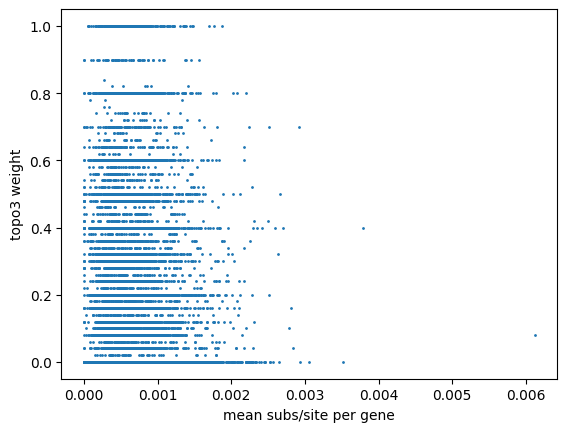

In [104]:
plt.scatter(list(subs.mean(axis=1)), list(combined_df["topo3"]), s=1)
plt.ylabel("topo3 weight")
plt.xlabel("mean subs/site per gene");

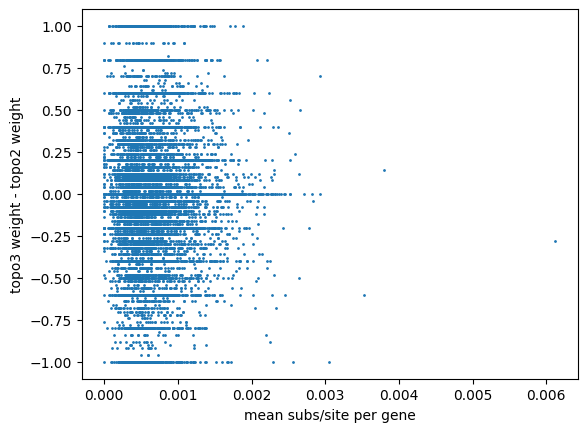

In [105]:
plt.scatter(list(subs.mean(axis=1)), list(combined_df["t3t2_diff"]), s=1)
plt.ylabel("topo3 weight - topo2 weight")
plt.xlabel("mean subs/site per gene");

In [106]:
subs.mean()

CAW147_4_S462         0.000455
CAW65_17_S470         0.000198
CAW41_PL6_S478        0.000202
CAW62_6_S476          0.000358
CAW41_PL5_S477        0.000239
CAW98_1_S441          0.002572
THD_grac_S382         0.000480
THD_okla_002A_S375    0.001436
THD_hirs_005J_S373    0.001389
cardBL_1_S443         0.002587
lae_caw097-02_S318    0.000133
lae_caw080-01_S316    0.000391
CAW25_1_S452          0.000296
eat_caw124-10_S294    0.000230
CAW123_1_S454         0.000247
eat_caw078-01_S297    0.000191
CAW137_4_S455         0.000270
CAW28_1_S453          0.000988
CAW106_2_S451         0.000682
CAW138_3_S458         0.000420
CAW52-10_S473         0.000529
CAW43_10_S445         0.000477
CAW94_1_S446          0.002476
CAW155_2_S472         0.000453
CAW16_1_S449          0.000330
CAW55_9_S444          0.000664
CAW110_1_S456         0.000324
CAW156_3_S463         0.000788
CAW146_1_S464         0.000667
specios_alp2_S459     0.000824
fremon_alp1_S465      0.000521
CAW64_10_S468         0.000407
CAW64_1_

In [107]:
combined_df

,topo1,topo2,topo3,gene_id,trio,tree_no,t3t2_diff
Pbar_2022_maker4_15565-RB,1.0,0.0,0.0,Pbar_2022_maker4_15565-RB,laevis_eatonii_barbatus,9205,0.0
Pbar_2022_maker4_06040-RA,1.0,0.0,0.0,Pbar_2022_maker4_06040-RA,laevis_eatonii_barbatus,2921,0.0
Pbar_2022_maker4_06782-RA,1.0,0.0,0.0,Pbar_2022_maker4_06782-RA,laevis_eatonii_barbatus,3459,0.0
Pbar_2022_maker4_04883-RA,0.0,1.0,0.0,Pbar_2022_maker4_04883-RA,laevis_eatonii_barbatus,2710,-1.0
Pbar_2022_maker4_25762-RB,0.8,0.0,0.2,Pbar_2022_maker4_25762-RB,laevis_eatonii_barbatus,15836,0.2
...,...,...,...,...,...,...,...
Pbar_2022_maker4_00617-RD,1.0,0.0,0.0,Pbar_2022_maker4_00617-RD,laevis_eatonii_barbatus,376,0.0
Pbar_2022_maker4_17238-RA,0.8,0.0,0.2,Pbar_2022_maker4_17238-RA,laevis_eatonii_barbatus,9987,0.2
Pbar_2022_maker4_06036-RA,0.0,0.2,0.8,Pbar_2022_maker4_06036-RA,laevis_eatonii_barbatus,2917,0.6
Pbar_2022_maker4_24164-RA,1.0,0.0,0.0,Pbar_2022_maker4_24164-RA,laevis_eatonii_barbatus,14631,0.0
